In [ ]:
import os

In [2]:
# All of the tensorflow models come from:
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

#this is the name of the model that you will transfer learn too
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
#this is the model you will be learning from, This model name needs to match the model zoo link 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' 
# This is the model you will be cloning from the TensorFlow Model Zoo you can change it to any of the other ones you want to try.
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
# This is a script to convert the .xml files in each class to .tfrecords for training tensorflow models.
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
# This is a file that will be created to store the labels of the lego pieces or whatever you want to train against.
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('tensorflow_config'),
    'IMAGES_PATH' : os.path.join('lego-mindstorm-ev3-pictures', 'yoloimages2'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
 }

In [53]:
TENSORFLOW_CONFIG_FILES = os.path.join('tensorflow_config')

TRAIN_PATH = os.path.join(TENSORFLOW_CONFIG_FILES, 'train')
TEST_PATH = os.path.join(TENSORFLOW_CONFIG_FILES, 'test')
VALIDATION_PATH = os.path.join(TENSORFLOW_CONFIG_FILES, 'val')
TFLITE_DIR = os.path.join('RunTFLite')

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 85381, done.
remote: Counting objects: 100% (1009/1009), done.
remote: Compressing objects: 100% (445/445), done.
remote: Total 85381 (delta 614), reused 935 (delta 559), pack-reused 84372
Receiving objects: 100% (85381/85381), 598.55 MiB | 62.06 MiB/s, done.
Resolving deltas: 100% (61103/61103), done.


In [7]:
#Linux instructionsions
if os.name=='posix':
    #You may have to run the following command manually because the jupyter notebook doesn't have SUDO privilages  
    !sudo apt install protobuf-compiler
    #In a terminal navigate into the below directory
    !cd Tensorflow/models/research 
    #While still in the research directory Use protobuf-compiler to build the protos
    !protoc object_detection/protos/*.proto --python_out=.
    #While still in research copy the proto file that was just created
    !cp object_detection/packages/tf2/setup.py . 
    #While still in research run the python to install
    !python3 -m pip install . 


#Windows Instructions
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 
    

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/bin/python: No module named pip


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
# The last line after this script runs should print out 'OK'
# If its not installing you may be missing pip packages or there
# may be conflicts in pip packages. 
!python3 {VERIFICATION_SCRIPT}



2023-05-08 01:20:20.218623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 01:20:20.732032: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-08 01:20:20.732068: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-08 01:20:20.732074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [ ]:
#These will refresh your protos for matplot lib which might cause issues

!pip3 uninstall protobuf matplotlib -y
!pip3 install protobuf matplotlib==3.2

In [13]:
!pip3 install tensorflow --upgrade

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.4 MB/s eta 0:00:00m eta 0:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.1/191.1 kB 34.4 MB/s eta 0:00:00
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-manylinux2014_x86_64.whl (6.6 MB)
  Created wheel for jax: file

In [14]:
import object_detection
!pip3 list
#The below list is what my pip3 looks

Package                       Version
----------------------------- --------------------------
absl-py                       1.4.0
addict                        2.4.0
aiofiles                      22.1.0
aiosqlite                     0.18.0
anyio                         3.6.2
apache-beam                   2.45.0
apt-xapian-index              0.49
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astor                         0.8.1
asttokens                     2.2.0
astunparse                    1.6.3
attrs                         22.1.0
avro-python3                  1.10.2
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
cachetools                    5.3.0
catfish                       4.16.3
certifi                       2020.6.20
cffi                          1.15.1
chardet                       4.0.0
charset-normalizer         

In [15]:
# This downloads the pretrained models from the Model Zoo and then decompresses them...
# into the model
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-05-07 22:02:01--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.163.128, 2607:f8b0:4004:c1b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.163.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  38.4MB/s    in 0.5s    

2023-05-07 22:02:02 (38.4 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz.1’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco1

In [ ]:
# I ran these because i was having problems with my opencv version
# working so I found the solution was to uninstall and reinstall
!pip3 uninstall opencv-python -y
!pip3 uninstall opencv-contrib-python -y

!pip3 install opencv-contrib-python
!pip3 install opencv-python

!pip3 install pandas

In [9]:
import cv2

import uuid

import time

import pandas as pd
import os
import glob
from lxml import etree

import glob
import pickle
import xml.etree.ElementTree as ET
from os import listdir, getcwd
from os.path import join
import shutil
import random
import yaml

In [8]:
cwd = os.getcwd();
cwd

'/home/crexiz/Documents/LegoMindstormEV3Sorting'

In [26]:
def delete_directory(directory):
    if(os.path.exists(directory)):
        try:
            shutil.rmtree(directory)
        except FileNotFoundError:
            print(f'Directory not found: {directory}')
        except OSError as e:
            print(f'Error deleting directory: {e}')

def get_directory_names(path):
    directories = []
    with os.scandir(path) as entries:
        for entry in entries:
            if entry.is_dir():
                directories.append(entry.name)
    return sorted(directories)

def getImagesInDir(dir_path):
    image_list = []
    for filename in glob.glob(dir_path + '/*.jpg'):
        image_list.append(filename)

    return image_list

def split_list_randomly(strings, testPercent, valPercent):
    total_length = len(strings)
    testIdx = int(total_length * testPercent)
    valIdx = testIdx + int(total_length * valPercent)

    # Shuffle the input list in-place
    shuffled_strings = strings.copy()
    random.shuffle(shuffled_strings)

    # Split the shuffled list into two parts
    testNames = shuffled_strings[:testIdx]
    valNames = shuffled_strings[testIdx:valIdx]
    trainNames = shuffled_strings[valIdx:]

    return testNames, valNames, trainNames

def make_train_test_val_dirs(output_dir):
    print("Making Directories for tensorflow in ,", output_dir)
    os.makedirs(output_dir)
    os.makedirs(TEST_PATH)
    os.makedirs(TRAIN_PATH)
    os.makedirs(VALIDATION_PATH)

def seperate_test_train_tensorFlow(directory_names,source_dir, testPercent, valPercent ):
    
    for dir_path in directory_names:
        print('Creating , ', dir_path)
        full_path = os.path.join(source_dir, dir_path)
        image_paths = getImagesInDir(os.path.join(source_dir, dir_path))
        base_names = []
        for image_path in image_paths:
            basename = os.path.basename(image_path)
            basename_no_ext = os.path.splitext(basename)[0]
            base_names.append(basename_no_ext)
            
        test,val,train = split_list_randomly(base_names, testPercent, valPercent)
        
        for ele in test:
            shutil.copy((full_path + '/' + ele + '.jpg'), os.path.join(cwd, TEST_PATH))
            shutil.copy((full_path+ '/' + ele + '.xml'), os.path.join(cwd, TEST_PATH))
        
        for ele in val:
            shutil.copy((full_path+ '/' + ele + '.xml'), os.path.join(cwd, VALIDATION_PATH))
            shutil.copy((full_path + '/' + ele + '.jpg'), os.path.join(cwd, VALIDATION_PATH))

        for ele in train:
            shutil.copy((full_path + '/' + ele + '.xml'), os.path.join(cwd, TRAIN_PATH))
            shutil.copy((full_path + '/' + ele + '.jpg'), os.path.join(cwd, TRAIN_PATH))


In [27]:
source_dir = os.path.join(cwd, paths['IMAGES_PATH'])
output_dir = os.path.join(cwd, TENSORFLOW_CONFIG_FILES)
if(os.path.exists(output_dir)):
    delete_directory(output_dir)
make_train_test_val_dirs(output_dir)
directory_names = get_directory_names(source_dir)







Making Directories for tensorflow in , /home/crexiz/Documents/LegoMindstormEV3Sorting/tensorflow_config


In [28]:
#This seperates the train and test enter the percentages as decimal so 10% = .1
seperate_test_train_tensorFlow(directory_names, source_dir, .05, .1)

Creating ,  3spokeangularblock3x120grey
Creating ,  Angularbeam2x4modulered
Creating ,  Angularbeam3x5modulegrey
Creating ,  Angularbeam3x5modulewhite
Creating ,  Angularbeam3x7modulegrey
Creating ,  Angularbeam4x4modulewhite
Creating ,  Angularbeam4x6moduleblack
Creating ,  Angularblock10black
Creating ,  Angularblock2180black
Creating ,  Angularblock690black
Creating ,  Angularconnectorpeg3x3modulegrey
Creating ,  Axle10moduleblack
Creating ,  Axle12moduleblack
Creating ,  Axle2modulered
Creating ,  Axle3modulegrey
Creating ,  Axle4moduleblack
Creating ,  Axle5modulegrey
Creating ,  Axle6moduleblack
Creating ,  Axle7modulegrey
Creating ,  Axle8moduleblack
Creating ,  Axle9modulegrey
Creating ,  Axlewithstop4moduledarkgrey
Creating ,  Axlewithstop8moduledarkgrey
Creating ,  Axlewithstud3moduledarkbeige
Creating ,  Ballbearingdarkgrey
Creating ,  Beam11modulegrey
Creating ,  Beam13modulegrey
Creating ,  Beam15modulewhite
Creating ,  Beam3moduleblack
Creating ,  Beam3moduleblue
Creating

In [29]:
#This generates a label map for the tensorflow training
with open(files['LABELMAP'], 'w') as f:
    for i, lable in enumerate(directory_names):
        print(lable)
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(lable))
        f.write('\tid:{}\n'.format(i+1))
        f.write('}\n')

['3spokeangularblock3x120grey', 'Angularbeam2x4modulered', 'Angularbeam3x5modulegrey', 'Angularbeam3x5modulewhite', 'Angularbeam3x7modulegrey', 'Angularbeam4x4modulewhite', 'Angularbeam4x6moduleblack', 'Angularblock10black', 'Angularblock2180black', 'Angularblock690black', 'Angularconnectorpeg3x3modulegrey', 'Axle10moduleblack', 'Axle12moduleblack', 'Axle2modulered', 'Axle3modulegrey', 'Axle4moduleblack', 'Axle5modulegrey', 'Axle6moduleblack', 'Axle7modulegrey', 'Axle8moduleblack', 'Axle9modulegrey', 'Axlewithstop4moduledarkgrey', 'Axlewithstop8moduledarkgrey', 'Axlewithstud3moduledarkbeige', 'Ballbearingdarkgrey', 'Beam11modulegrey', 'Beam13modulegrey', 'Beam15modulewhite', 'Beam3moduleblack', 'Beam3moduleblue', 'Beam3modulegreen', 'Beam3modulered', 'Beam3moduleyellow', 'Beam5modulegrey', 'Beam7modulegrey', 'Beam9modulegrey', 'Beamwithcrosshole2moduleblack', 'Bevelgear12toothbeige', 'Bushing1modulegrey', 'Bushingaxleextender2modulered', 'Bushingmoduleyellow', 'Connectorpeg2modulegrey'

In [174]:
#This downloads a xml to tfrecord converter script
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [162]:
!pip3 list


Package                       Version
----------------------------- --------------------------
absl-py                       1.4.0
addict                        2.4.0
aiofiles                      22.1.0
aiosqlite                     0.18.0
anyio                         3.6.2
apache-beam                   2.45.0
apt-xapian-index              0.49
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astor                         0.8.1
asttokens                     2.2.0
astunparse                    1.6.3
attrs                         22.1.0
avro-python3                  1.10.2
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
cachetools                    5.3.0
catfish                       4.16.3
certifi                       2020.6.20
cffi                          1.15.1
chardet                       4.0.0
charset-normalizer         

In [30]:
# This generates the tf record for train and test and stores it in the tensorflow_config file
!python3 {files['TF_RECORD_SCRIPT']} -x {os.path.join(TENSORFLOW_CONFIG_FILES, 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python3 {files['TF_RECORD_SCRIPT']} -x {os.path.join(TENSORFLOW_CONFIG_FILES, 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: tensorflow_config/train.record
Successfully created the TFRecord file: tensorflow_config/test.record


In [31]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [32]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [33]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [34]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [35]:
# This updates the training configurations within /TensorFlow/workspace/models/**customModelName**/pipeline.config
pipeline_config.model.ssd.num_classes = len(directory_names)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [36]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [37]:
command = "python3 {} --model_dir={} --pipeline_config_path={} --num_train_steps=1000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

print('Run this command in a terminal and you should start to see results like the next cell')
print(command)

Run this command in a terminal
python3 Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=1000


You should start to get outputs that look like this. If not tensorflow install might be having some problems with your gpu so make sure your tensorflow-gpu pip install works with your NVIDIA CUDa INstall. I always just ran it with the cpu cause it was more consistent.

/home/crexiz/.local/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
I0508 01:38:49.009340 140213426841344 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0508 01:38:54.194231 140213426841344 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
WARNING:tensorflow:From /home/crexiz/.local/lib/python3.9/site-packages/tensorflow/python/util/deprecation.py:629: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
W0508 01:38:58.277815 140213946926848 deprecation.py:554] From /home/crexiz/.local/lib/python3.9/site-packages/tensorflow/python/util/deprecation.py:629: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
I0508 01:38:58.805033 140213946926848 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0508 01:39:02.552918 140213946926848 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0508 01:39:05.940795 140213946926848 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0508 01:39:09.605931 140213946926848 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
INFO:tensorflow:Step 100 per-step time 0.572s
I0508 01:39:55.260419 140223541659456 model_lib_v2.py:705] Step 100 per-step time 0.572s
INFO:tensorflow:{'Loss/classification_loss': 0.89221627,
 'Loss/localization_loss': 0.4534683,
 'Loss/regularization_loss': 0.15373178,
 'Loss/total_loss': 1.4994164,
 'learning_rate': 0.0319994}
I0508 01:39:55.260590 140223541659456 model_lib_v2.py:708] {'Loss/classification_loss': 0.89221627,
 'Loss/localization_loss': 0.4534683,
 'Loss/regularization_loss': 0.15373178,
 'Loss/total_loss': 1.4994164,
 'learning_rate': 0.0319994}
INFO:tensorflow:Step 200 per-step time 0.390s
I0508 01:40:34.249553 140223541659456 model_lib_v2.py:705] Step 200 per-step time 0.390s
INFO:tensorflow:{'Loss/classification_loss': 1.003073,
 'Loss/localization_loss': 0.36183712,
 'Loss/regularization_loss': 0.15392914,
 'Loss/total_loss': 1.5188392,
 'learning_rate': 0.0373328}
I0508 01:40:34.249713 140223541659456 model_lib_v2.py:708] {'Loss/classification_loss': 1.003073,
 'Loss/localization_loss': 0.36183712,
 'Loss/regularization_loss': 0.15392914,
 'Loss/total_loss': 1.5188392,
 'learning_rate': 0.0373328}


In [43]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# The ckpt-1 in this is found in the CHECKPOINT_PATH as you train more the ckpt-#Number will go up
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-1')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
category_index

{1: {'id': 1, 'name': '3spokeangularblock3x120grey'},
 2: {'id': 2, 'name': 'Angularbeam2x4modulered'},
 3: {'id': 3, 'name': 'Angularbeam3x5modulegrey'},
 4: {'id': 4, 'name': 'Angularbeam3x5modulewhite'},
 5: {'id': 5, 'name': 'Angularbeam3x7modulegrey'},
 6: {'id': 6, 'name': 'Angularbeam4x4modulewhite'},
 7: {'id': 7, 'name': 'Angularbeam4x6moduleblack'},
 8: {'id': 8, 'name': 'Angularblock10black'},
 9: {'id': 9, 'name': 'Angularblock2180black'},
 10: {'id': 10, 'name': 'Angularblock690black'},
 11: {'id': 11, 'name': 'Angularconnectorpeg3x3modulegrey'},
 12: {'id': 12, 'name': 'Axle10moduleblack'},
 13: {'id': 13, 'name': 'Axle12moduleblack'},
 14: {'id': 14, 'name': 'Axle2modulered'},
 15: {'id': 15, 'name': 'Axle3modulegrey'},
 16: {'id': 16, 'name': 'Axle4moduleblack'},
 17: {'id': 17, 'name': 'Axle5modulegrey'},
 18: {'id': 18, 'name': 'Axle6moduleblack'},
 19: {'id': 19, 'name': 'Axle7modulegrey'},
 20: {'id': 20, 'name': 'Axle8moduleblack'},
 21: {'id': 21, 'name': 'Axle9mo

In [44]:
IMAGE_PATH = getImagesInDir(TEST_PATH)[0]
IMAGE_PATH

'tensorflow_config/test/Connectorpeg3modulebeige.89d2ff1e-d98a-11ed-afe3-049226d86d19.jpg'

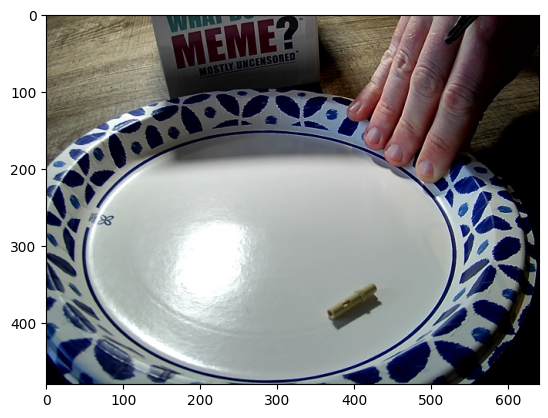

This may not show anything unless you train for a while 
 but it should draw a box and label if it finds something.


In [47]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}

detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=1,
            min_score_thresh=.6,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

print('This may not show anything unless you train for a while \n but it should draw a box and label if it finds something.'
)

In [ ]:
#This is to run the code on a webcam
# The videoCapture source changes every time
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=1,
                min_score_thresh=.6,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

Export to TFLite File


In [48]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

command = "python3 {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

print("Run this command in the root directory of the project: \n \n" + command)

Run this command in the root directory of the project: 
 
python3 Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/export


In [50]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')
command = "python3 {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])
print("Run this command in the root directory of the project: \n \n" + command)

Run this command in the root directory of the project: 
 
python3 Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet --output_directory=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport


In [52]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )
print("Run this command in the root directory of the project: \n \n" + command)

Run this command in the root directory of the project: 
 
tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [56]:
# This copies the tflite file to the RunTFLite Directory where you can run the python3 runtime.py script
shutil.copy(TFLITE_MODEL, TFLITE_DIR)

'RunTFLite/detect.tflite'